# Cleaning and Coding Your Data

In this lab, we will be learning about basic data manipulation and cleaning tools in Stata. Before we can begin analyzing the relationship between our independent and dependent variables, we need to make sure variable coding matches the concepts we are trying to measure and is appropriate for the tests we are conducting. 

We will use public opinion data available from the Roper Center, a comprehensive repository of survey data. TCNJ has an institutional membership to Roper, so you can access and download the data. To access:
1. Access Roper using your TCNJ institutional credentials [here](https://tcnj.primo.exlibrisgroup.com/permalink/01COLLNJ_INST/ouchcg/alma998912023405191).
2. Search for study #31117583, the July 2020 AP-NORC Poll and select the "Studies/Datasets" tab.
3. Click on the spreadsheet with the Stata icon to download the dataset: ![image.png](graphics\Stata_roper_link2.png)
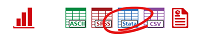
4. Be sure to place 31117583.dta in a folder you can easily access. 
5. Set your working directory to that folder using the ***cd*** command.

Now, let's get started!

In [17]:
* Change the file path below to the appropriate working directory for your machine
quietly cd c:\Users\bowen\OneDrive\Courses\Political_Analysis\Labs\F2020\
quietly use 31117583.dta, clear 

## Creating and deleting variables

### generate


The ***generate*** command allows you to create new variables by setting the new variable to a specified value or values. We can refer to existing variables or call up built-in Stata functions to do so. 

In [2]:
 * SYNTAX: gen some_new_name = some_value

 * first, let's create a numeric variable called "type"
 *   this code will give every observation the value of 1
generate type = 1
codebook type




--------------------------------------------------------------------------------
type                                                                 (unlabeled)
--------------------------------------------------------------------------------

                  type:  numeric (float)

                 range:  [1,1]                        units:  1
         unique values:  1                        missing .:  0/1,057

            tabulation:  Freq.  Value
                         1,057  1


In [3]:
 * second, let's create a string variable named "category"
 *   by enclosing the value in quotes
generate category = "Group A"
codebook category




--------------------------------------------------------------------------------
category                                                             (unlabeled)
--------------------------------------------------------------------------------

                  type:  string (str7)

         unique values:  1                        missing "":  0/1,057

            tabulation:  Freq.  Value
                         1,057  "Group A"



In [15]:
 * third, let's create a new variable using Stata's random number function
 *   this command will set the new variable to a random number between
 *   0 and 1

 * note: you can shorten generate to gen
gen randnumb = runiform()
sum randnumb





    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    randnumb |      1,057    .5157681    .2859402   .0014988    .999561


In [16]:
 * fourth, let's create a new variable that calls data from an existing variable
 *   in the first gen command, our randnumb variable is logged 
 *   in the second, our new var is randnumb divided by 1000

gen lnrandnumb = ln(randnumb)
gen randnumb2 = randnumb/1000

tabstat randnumb randnumb2 lnrandnumb, ///
    statistics(n mean range) columns(statistics)





    variable |         N      mean     range
-------------+------------------------------
    randnumb |      1057  .5157681  .9980622
   randnumb2 |      1057  .0005158  .0009981
  lnrandnumb |      1057 -.9525456  6.502634
--------------------------------------------


### drop

Use ***drop*** to delete variables. But, always be careful when doing so: if you delete a variable and then save your dataset, those changes will be lost forever. Again, always generate and delete variables using your script, _not the command line_. You can drop one or more variables at a time.

In [6]:
* Let's drop our new, unnecessary variables:
drop category type 

## Changing variable values

### recode

The easiest way to change an existing variable's values is ***recode***. The syntax asks the user to assign a new value to one or more old values. Always use the ***gen(newvar)*** option to create a new variable instead of replacing the existing one. That way you can always recover (and understand) the coding change.

In [7]:
 * SYNTAX: recode oldvar (oldvalue = newvalue) (oldvalue=newvalue), gen(newvar)
 * Example: create an indicator variable for Latinx respondents by setting
 *    all those identifying as Latinx as 1 and all other respondents as 0
codebook raceth
recode raceth (1 2 4= 0)(3=1), gen(latinx)

 * alternatively, we could run:
 * recode raceth (1=0)(2=0)(3=1)(4=0), gen(latinx) 



--------------------------------------------------------------------------------
raceth                                                    RACETH: Race/ethnicity
--------------------------------------------------------------------------------

                  type:  numeric (byte)
                 label:  RACETH

                 range:  [1,4]                        units:  1
         unique values:  4                        missing .:  0/1,057

            tabulation:  Freq.   Numeric  Label
                           788         1  (1) White, non-Hispanic
                            50         2  (2) African American,
                                          non-Hispanic
                           135         3  (3) Hispanic
                            84         4  (4) Other

(1057 differences between raceth and latinx)


In [8]:
 * We can also recode a range of values using / :
recode randnumb (0/.25=0)(.25/.5=1)(.5/.75=2)(.75/1=3), gen(rand3cat)

(1057 differences between randnumb and rand3cat)


### replace

The ***replace*** command can reassign values of an existing variable. Let's create an indicator variable denoting Black respondents using a combination of ***gen*** and ***replace*** using _if_ to select specific observations.

In [9]:
* first, create the new variable, setting all values to missing data (.)
gen black = .

* now set our Black respondents to equal 1 on the new variable. We
*   can select Black respondents from the existing raceth variable
replace black = 1 if raceth==2
* now set the other respondents to 0. The "|" means "or"
replace black = 0 if raceth ==1 | raceth==3 | raceth==4
* check the new variable:
codebook black


(1,057 missing values generated)

(50 real changes made)

(1,007 real changes made)


--------------------------------------------------------------------------------
black                                                                (unlabeled)
--------------------------------------------------------------------------------

                  type:  numeric (float)

                 range:  [0,1]                        units:  1
         unique values:  2                        missing .:  0/1,057

            tabulation:  Freq.  Value
                         1,007  0
                            50  1


## Labeling

### label variable

Variable labels are useful for data transparency and to guide the future you as you analyze the data. Labels will show up in the variable window in the Stata GUI as well as printed in the results window through the ***codebook*** and ***describe*** commands.

In [10]:
* SYNTAX: label variable varname "label"
label var latinx "Latinx respondent indicator variable (Latinx = 1)"
label var black "Black respondent indicator variable (Black = 1)"
describe latinx black





              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
latinx          byte    %9.0g                 Latinx respondent indicator
                                                variable (Latinx = 1)
black           float   %9.0g                 Black respondent indicator
                                                variable (Black = 1)


### label define and label values

Labeling values of a variable is a two-step process. The ***label define*** command creates a label that is saved with the dataset and then can be applied to any variable. ***label values*** attaches a label to a variable.

In [11]:
* SYNTAX: label define labelname value "label" value "label"
* let's create a labels called blacklbl and latinxlbl:
label define blacklbl 1 "Black Respondent" 0 "Non-Black Respondent"
label define latinxlbl 1 "Latinx Respondent" 0 "Non-Latinx Respondent"

In [12]:
* SYNTAX: label values varname labelname
* Now attach the labels to the variables:
label values black blacklbl
label values latinx latinxlbl 

* let's check out if the labeling worked. the value label names should 
*   show up in the value label column from the describe command below
describe latinx black





              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
latinx          byte    %21.0g     latinxlbl
                                              Latinx respondent indicator
                                                variable (Latinx = 1)
black           float   %20.0g     blacklbl   Black respondent indicator
                                                variable (Black = 1)
